In [ ]:
import pmdarima as pm

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',100)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs

# Set wide fig size for plots
plt.rcParams['figure.figsize']=(12,3)


In [ ]:
url = 'C:/Users/Work/Desktop/PythonData Science/Jupyter Notebook/data/Crimes_-_2001_to_Present.csv'
df = pd.read_csv(url)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7946092 entries, 0 to 7946091
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [ ]:
df['Block'].nunique()

63482

In [ ]:
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']
df = df.drop(columns=drop_cols)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df.head()


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
0,11037294,2015-03-18 12:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,2015,NaN,NaN
1,11646293,2018-12-20 15:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,2018,NaN,NaN
2,11645836,2016-05-01 00:25:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,2016,NaN,NaN
3,11645959,2018-12-20 16:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,2018,NaN,NaN
4,11645601,2014-06-01 00:01:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,2014,NaN,NaN


In [ ]:
df_temp = df.copy()

In [ ]:
df = df.set_index('Date')


In [ ]:
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Date,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,2015,NaN,NaN
2018-12-20 15:00:00,11646293,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,2018,NaN,NaN
2016-05-01 00:25:00,11645836,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,2016,NaN,NaN
2018-12-20 16:00:00,11645959,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,2018,NaN,NaN
2014-06-01 00:01:00,11645601,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,2014,NaN,NaN


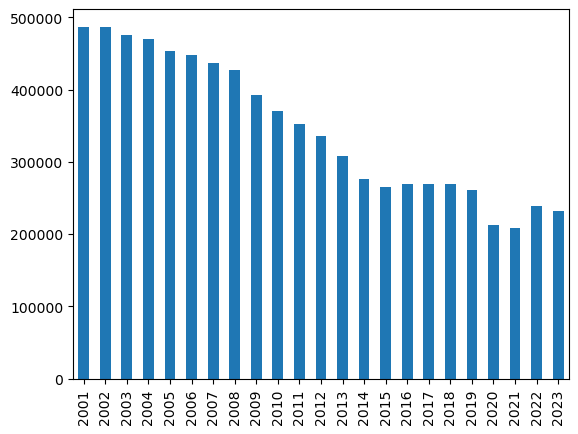

In [ ]:

years = df.index.year
years.value_counts().sort_index().plot(kind='bar');


# Topic 1) Comparing Police Districts

## Which district had the most crimes in 2022?
  - 8

In [ ]:
# District
df.groupby('District').size().sort_values().tail()

District
25.0    451554
7.0     457030
6.0     464803
11.0    508675
8.0     533605
dtype: int64

## Which had the least?
  - 21

In [ ]:
# District
df.groupby('District').size().sort_values().head()

District
21.0         4
31.0       249
20.0    141043
17.0    229389
24.0    240865
dtype: int64

# Topic 2) Crimes Across the Years:

## Is the total number of crimes increasing or decreasing across the years?
  - decreasing

<Axes: xlabel='Date'>

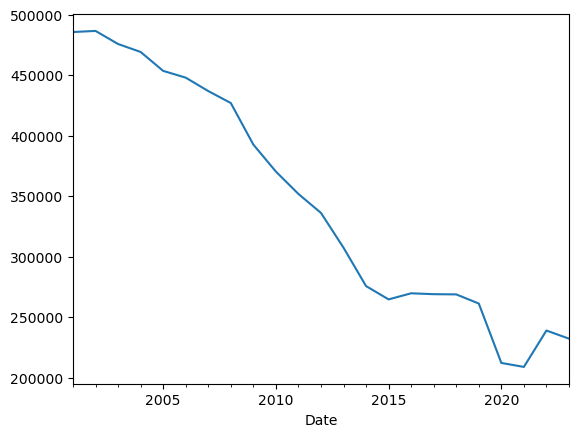

In [ ]:
df.resample('Y').size().plot()

## Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
  - yes
  - OBSCENITY                        
  - INTERFERENCE WITH PUBLIC OFFICER
  - CONCEALED CARRY LICENSE VIOLATION
  - STALKING                         
  - CRIMINAL SEXUAL ASSAULT          
  - WEAPONS VIOLATION                


In [ ]:
df['Primary Type'].unique()

array(['DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'THEFT', 'BATTERY',
       'ASSAULT', 'WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'SEX OFFENSE', 'BURGLARY', 'NARCOTICS', 'LIQUOR LAW VIOLATION',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL TRESPASS', 'ROBBERY',
       'PUBLIC PEACE VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'PROSTITUTION', 'STALKING', 'HOMICIDE', 'KIDNAPPING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING', 'OBSCENITY',
       'INTIMIDATION', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

In [ ]:
g_plot = df_temp.groupby('Primary Type').size()

In [ ]:
gs_plot = df.groupby('Primary Type').resample('Y').size()


In [ ]:
unstack_gs = gs_plot.unstack(level=0)
delt = unstack_gs.iloc[-1] - unstack_gs.iloc[0]
delt.sort_values()

Primary Type
BATTERY                             -53890.0
THEFT                               -48858.0
NARCOTICS                           -46040.0
CRIMINAL DAMAGE                     -28989.0
BURGLARY                            -19398.0
OTHER OFFENSE                       -15932.0
ASSAULT                             -11118.0
CRIMINAL TRESPASS                    -9037.0
ROBBERY                              -8709.0
PROSTITUTION                         -5821.0
PUBLIC PEACE VIOLATION               -1961.0
LIQUOR LAW VIOLATION                 -1474.0
MOTOR VEHICLE THEFT                  -1209.0
SEX OFFENSE                          -1051.0
GAMBLING                              -920.0
KIDNAPPING                            -805.0
DECEPTIVE PRACTICE                    -699.0
OFFENSE INVOLVING CHILDREN            -697.0
ARSON                                 -564.0
HOMICIDE                               -95.0
INTIMIDATION                           -59.0
PUBLIC INDECENCY                        -5

In [ ]:
# g_plot.sort_values(ascending=False).plot(kind='bar')

In [ ]:
# unstaced = df.groupby('Primary Type').resample('Y').size().unstack()


In [ ]:
# unstaced.plot(kind='bar')

# Topic 3) Comparing AM vs. PM Rush Hour:


## Are crimes more common during AM rush hour or PM rush hour?
    -  PM rush hours have more crimes in general


In [ ]:
df.sort_index().between_time("07:00","10:00").count().sum() > df.sort_index().between_time("16:00","19:00").count().sum()


False

## Answer the question: What are the top 5 most common crimes during AM rush hour?
  - THEFT          
  - BATTERY        
  - CRIMINAL DAMAGE
  - BURGLARY       
  - OTHER OFFENSE  


## What are the top 5 most common crimes during PM rush hour?
  - THEFT              
  - BATTERY            
  - CRIMINAL DAMAGE    
  - NARCOTICS          
  - ASSAULT             

In [ ]:
df.sort_index().between_time("07:00","10:00").groupby('Primary Type').size().sort_values(ascending=False).head()

Primary Type
THEFT              226880
BATTERY            122774
CRIMINAL DAMAGE     96169
BURGLARY            85738
OTHER OFFENSE       75865
dtype: int64

In [ ]:
df.sort_index().between_time("16:00","19:00").groupby('Primary Type').size().sort_values(ascending=False).head()

Primary Type
THEFT              343430
BATTERY            234799
CRIMINAL DAMAGE    159720
NARCOTICS          108596
ASSAULT             99837
dtype: int64

## Answer the question: Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
  - PM Rush Hour have more 'MOTOR VEHICLE THEFT'


In [ ]:
df['Primary Type'].unique()

array(['DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'THEFT', 'BATTERY',
       'ASSAULT', 'WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'SEX OFFENSE', 'BURGLARY', 'NARCOTICS', 'LIQUOR LAW VIOLATION',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL TRESPASS', 'ROBBERY',
       'PUBLIC PEACE VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'PROSTITUTION', 'STALKING', 'HOMICIDE', 'KIDNAPPING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING', 'OBSCENITY',
       'INTIMIDATION', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

In [ ]:
# MOTOR VEHICLE THEFT
df.sort_index().between_time("07:00","10:00").groupby('Primary Type').size().sort_values(ascending=False)['MOTOR VEHICLE THEFT']

51666

In [ ]:
df.sort_index().between_time("16:00","19:00").groupby('Primary Type').size().sort_values(ascending=False)['MOTOR VEHICLE THEFT']

71617

# Topic 4) Comparing Months:

In [ ]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None,
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index,
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();

    return fig, ax

# -----------------------------------------------------------------------------------------------------

# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d,
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags,
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

# -----------------------------------------------------------------------------------------------------

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics



# -----------------------------------------------------------------------------------------------------

def plot_acf_pacf(ts, nlags=40, figsize=(10, 5),
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},
                  annotate_seas=False, m = None,
                 seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)


    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)




    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()

    return fig

## Answer the question: ​What months have the most crime?
  - 2002-07 have the most crims

## What months have the least?
  - 2020-04 have the least crims

In [ ]:
df.resample('M').size().idxmax()

Timestamp('2002-07-31 00:00:00', freq='M')

In [ ]:
df.resample('M').size().idxmin()

Timestamp('2020-04-30 00:00:00', freq='M')

# You will compare the crime count forecast for 2 of the options below:
  - Theft
  - Total Crime (sum of all crime types).

In [ ]:
df = df.sort_index()
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Date,,,,,,,,,,,,
2001-01-01,10473864,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,OTHER,False,False,1233,12.0,2.0,2001,NaN,NaN
2001-01-01,1322043,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,825,8.0,NaN,2001,41.782292,-87.684799
2001-01-01,4637483,THEFT,AGG: FINANCIAL ID THEFT,OTHER,False,False,732,7.0,6.0,2001,41.768110,-87.640678
2001-01-01,8197725,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1121,11.0,27.0,2001,41.897476,-87.711355
2001-01-01,4498285,DECEPTIVE PRACTICE,FORGERY,BANK,False,False,411,4.0,8.0,2001,41.751610,-87.585331
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,13285638,CRIMINAL DAMAGE,TO PROPERTY,MOVIE HOUSE / THEATER,False,False,1411,14.0,35.0,2023,41.928822,-87.687782
2023-11-22,13287416,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,214,2.0,3.0,2023,41.822658,-87.616020
2023-11-22,13287595,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,412,4.0,8.0,2023,41.738754,-87.584234


In [ ]:
ts_th = df.groupby('Primary Type').resample("M").size()['THEFT'].asfreq('M')
ts_th
# ts_th.index.asfreq('M')

Date
2001-01-31    7867
2001-02-28    6669
2001-03-31    7766
2001-04-30    7702
2001-05-31    8420
              ... 
2023-07-31    5168
2023-08-31    5383
2023-09-30    4885
2023-10-31    5102
2023-11-30    3151
Freq: M, Length: 275, dtype: int64

In [ ]:
ts_to = df['Primary Type'].resample("M").size()
ts_to.name = "total"
ts_to

Date
2001-01-31    38120
2001-02-28    33788
2001-03-31    40568
2001-04-30    40091
2001-05-31    41839
              ...  
2023-07-31    23819
2023-08-31    23942
2023-09-30    22279
2023-10-31    22546
2023-11-30    14498
Freq: M, Name: total, Length: 275, dtype: int64

# let's start with ts_th ('THEFT')

In [ ]:
ts_th.isna().sum()

0

<Axes: xlabel='Date'>

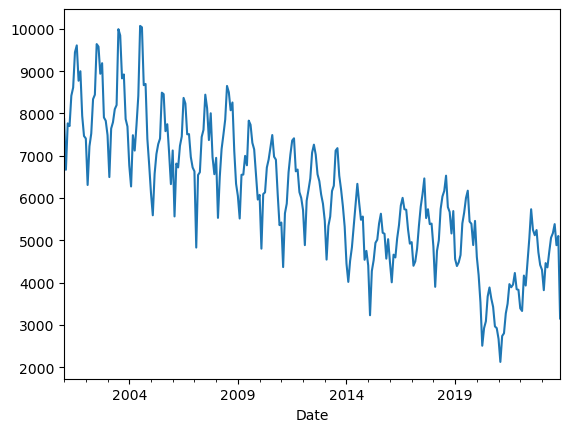

In [ ]:
ts_th.plot()

The seasonal component is  2501.68 which is ~31.48% of the variation in time series.


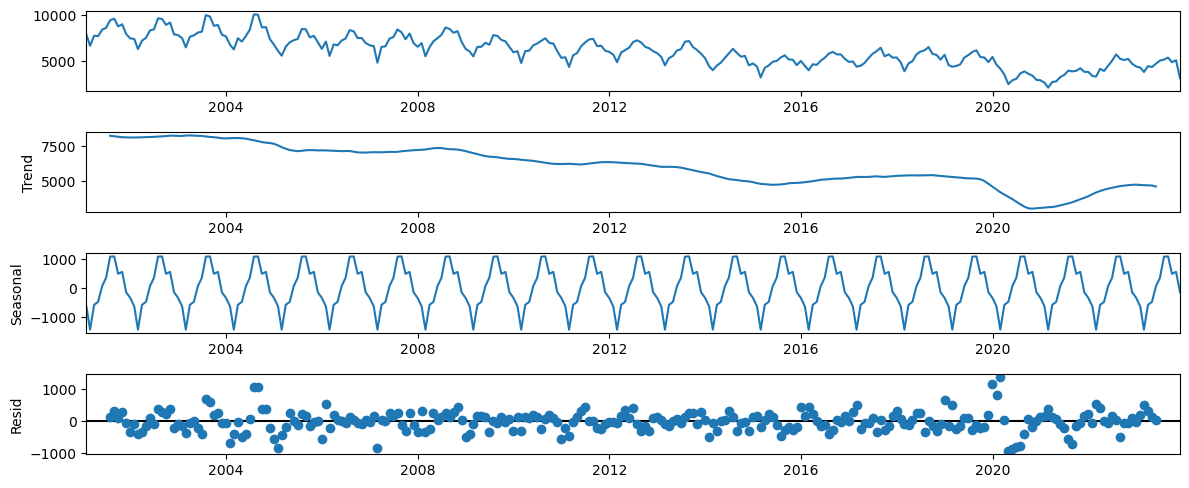

In [ ]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(ts_th)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()


# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta: .2f} which is ~{seasonal_delta/(ts_th.max()-ts_th.min()) * 100 :.2f}% of the variation in time series.")

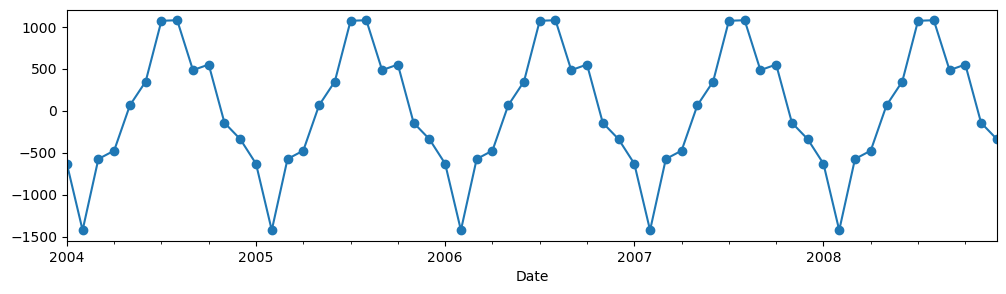

In [ ]:
# Narrow down the date range of the plot
seasonal = decomp.seasonal
ax = seasonal.loc['2004': '2008'].plot(marker = 'o')

# The seasonal period is 12, so we will use m = 12.

In [ ]:
# Check for stationarity
get_adfuller_results(ts_th)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.076431,13,261,0.724379,0.05,False


In [ ]:
# determine d
d = ndiffs(ts_th)
print (f'd = {d}')
# determine D
D = nsdiffs(ts_th, m = 12)
print (f'D = {D}')

d = 1
D = 0


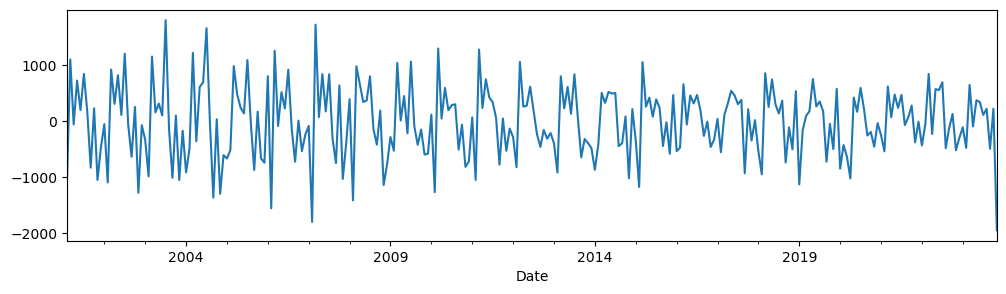

In [ ]:
# apply both differencings
ts_th_diff = ts_th.diff().dropna()
ts_th_diff.plot();

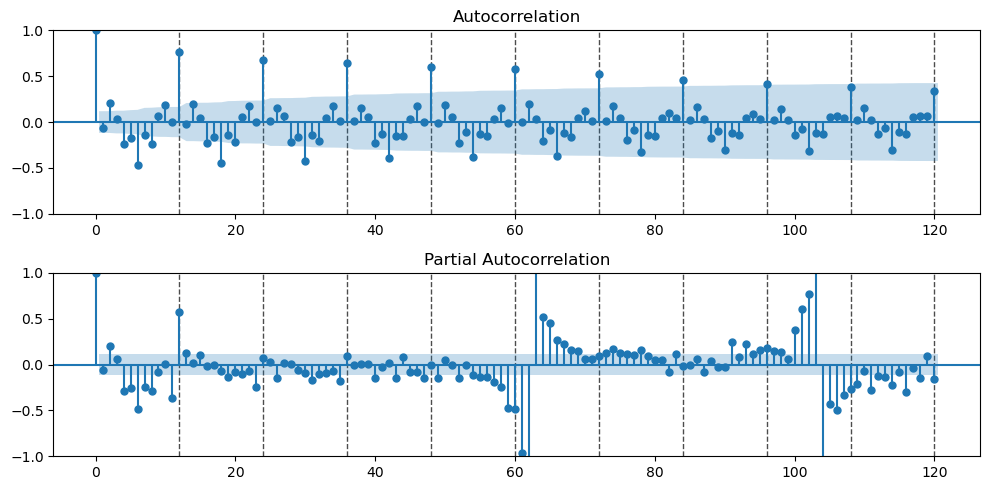

In [ ]:
# now look at the acf/pacf of the stationary data
plot_acf_pacf(ts_th_diff, annotate_seas = True, m = 12, nlags = 120);

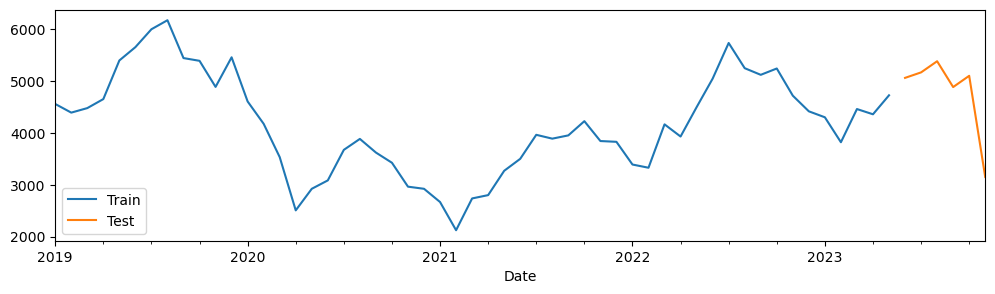

In [ ]:
# tts
train_th, test_th = train_test_split(ts_th, test_size=6)
ax = train_th.loc['2019':].plot(label='Train')
test_th.plot(ax=ax, label='Test')
ax.legend();

In [ ]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

sarima_th = tsa.ARIMA(train_th, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()
# Obtain summary
sarima_th.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  269
Model:             ARIMA(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -1969.635
Date:                           Tue, 05 Dec 2023   AIC                           3947.269
Time:                                   15:39:54   BIC                           3961.633
Sample:                               01-31-2001   HQIC                          3953.039
                                    - 05-31-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1999      0.278     -0.718      0.473      -0.746       0.346
ma.L1         -0.0025      0.284     -0.009      0.993      -0.559       0.554
ar.S.L12       0.7893      0.026     30.765      0.000       0.739       0.840
sigma2      1.285e+05   9291.094     13.829      0.000     1.1e+05    1.47e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 9.24
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               0.80   Skew:                            -0.12
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

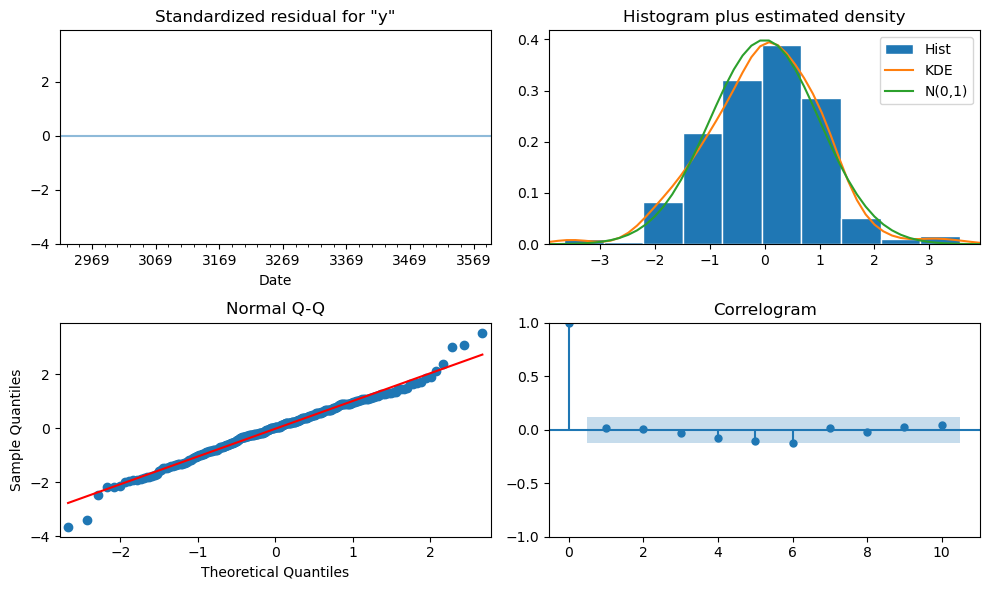

In [ ]:
# Obtain diagnostic plots
fig = sarima_th.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 508.282
- MSE = 599,810.601
- RMSE = 774.474
- R^2 = -0.071
- MAPE = 13.55%


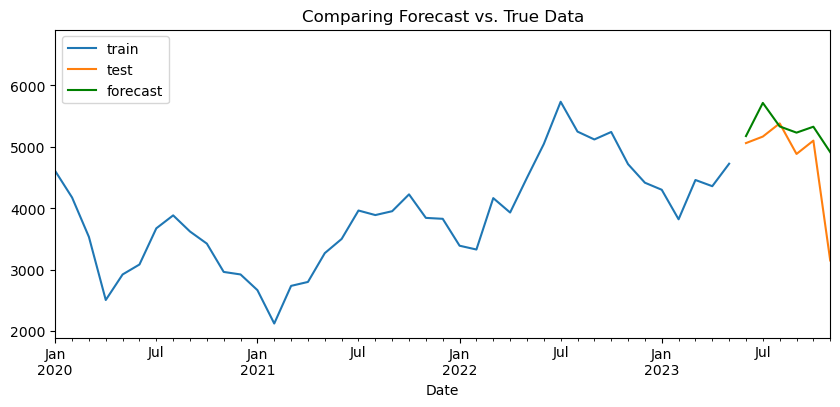

In [ ]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df_th = sarima_th.get_forecast(steps=len(test_th)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train_th.loc['2020':], test_th, forecast_df_th);
# Obtain metrics
regression_metrics_ts(test_th, forecast_df_th['mean'])

In [ ]:
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model_th = pm.auto_arima(
    train_th,
    seasonal=True,
    m=12,
    trace=True
)


# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model_th.order)
print(auto_model_th.seasonal_order)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4217.356, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3947.097, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4077.094, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4215.451, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4217.593, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3927.857, Time=0.57 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3898.662, Time=1.31 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3898.458, Time=0.64 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4076.244, Time=0.21 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3896.319, Time=1.15 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=4030.581, Time=0.52 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=3901.413, Time=1.49 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3909.474, Time=1.04 sec
 ARIMA(2,1,0)(1,0,2)[12]

In [ ]:
# Obtain summary of the best model from auto_arima
auto_model_th.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  269
Model:             SARIMAX(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1942.153
Date:                                 Tue, 05 Dec 2023   AIC                           3896.307
Time:                                         15:51:41   BIC                           3917.853
Sample:                                     01-31-2001   HQIC                          3904.960
                                          - 05-31-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.3403      1.671     -0.802      0.423      -4.616       1.935
ma.L1         -0.2272      0.044     -5.124      0.000      -0.314      -0.140
ar.S.L12       0.9773      0.008    118.443      0.000       0.961       0.993
ma.S.L12      -0.5624      0.056    -10.105      0.000      -0.671      -0.453
ma.S.L24      -0.1340      0.065     -2.056      0.040      -0.262      -0.006
sigma2      1.003e+05   6846.705     14.650      0.000    8.69e+04    1.14e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                30.36
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.40
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

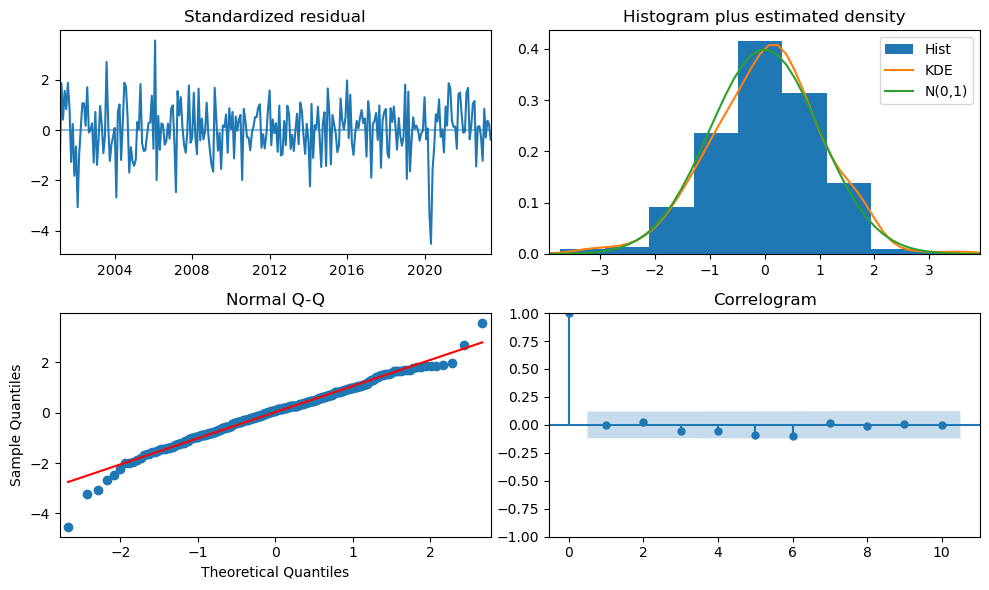

In [ ]:
# Obtain diagnostic plots
fig = auto_model_th.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

C:\Users\Work\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 460.755
- MSE = 512,155.940
- RMSE = 715.651
- R^2 = 0.086
- MAPE = 12.37%


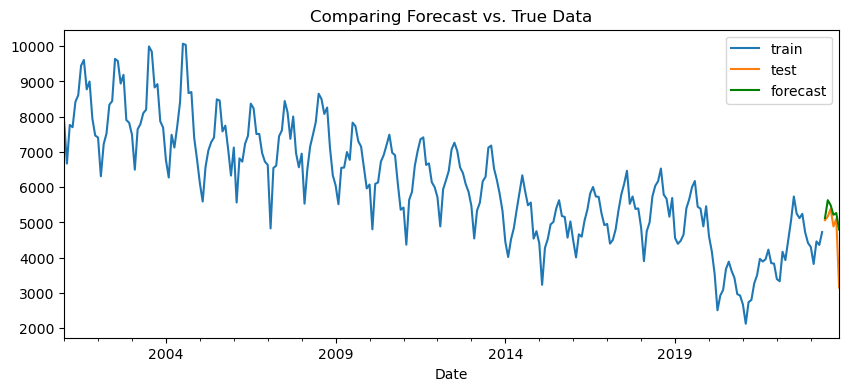

In [ ]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train_th, order=auto_model_th.order, seasonal_order=auto_model_th.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test_th)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train_th, test_th, forecast_df);
# Obtain metrics
regression_metrics_ts(test_th, forecast_df['mean'])

In [ ]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 0  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 2  # Seasonal MA
m = 12 # Seasonal period

final_model_th = tsa.ARIMA(ts_th, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()



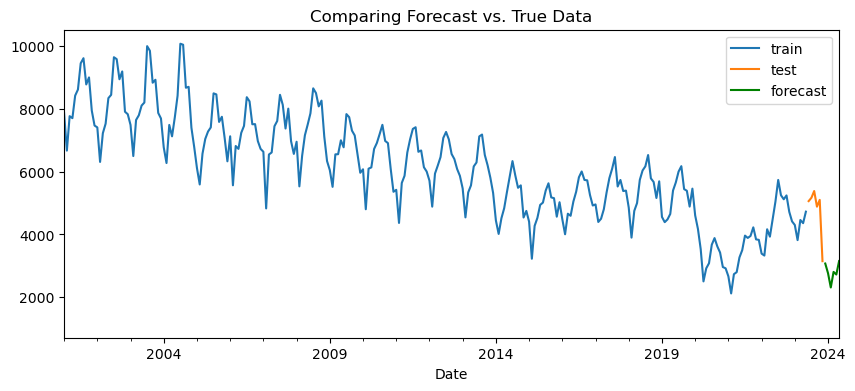

In [ ]:
# Obtain future forecasts beyond test data
forecast_df_th  = final_model_th.get_forecast(len(test_th)).summary_frame()
plot_forecast(train_th,test_th,forecast_df_th);

# Now with ts_to (total count of all crims)


<Axes: xlabel='Date'>

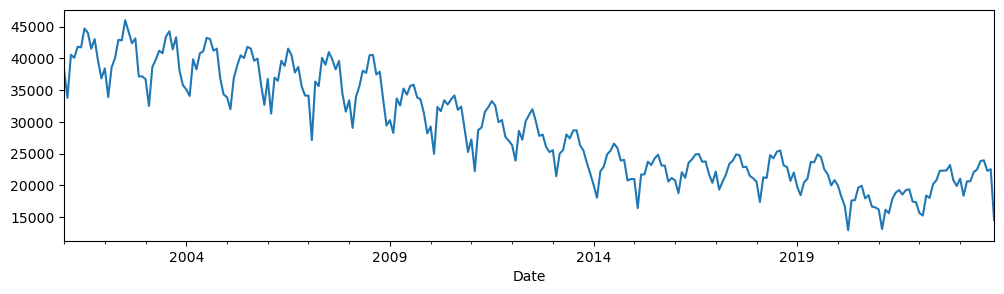

In [ ]:
ts_to.plot()

The seasonal component is  8735.26 which is ~26.40% of the variation in time series.


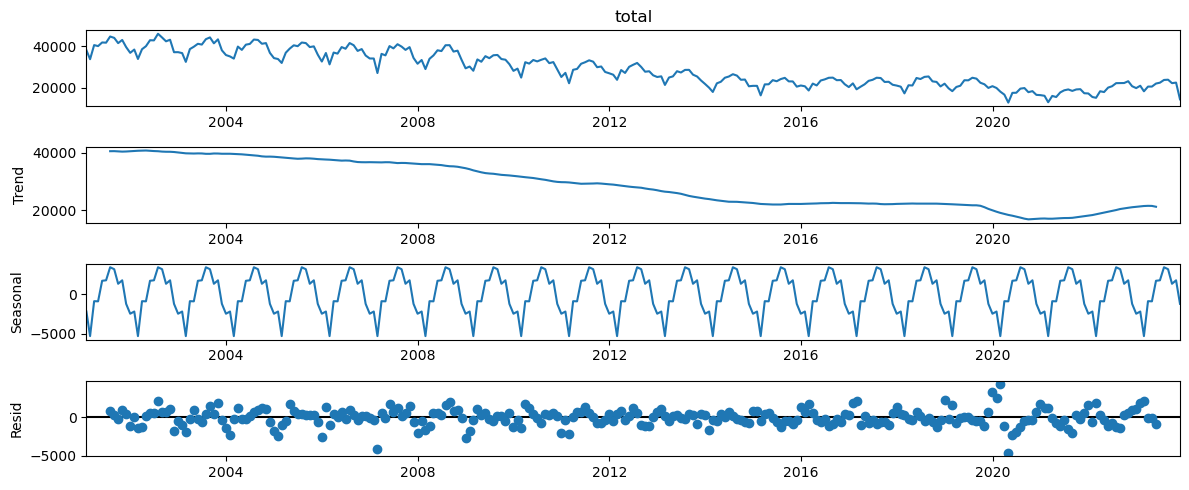

In [ ]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(ts_to)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()


# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta: .2f} which is ~{seasonal_delta/(ts_to.max()-ts_to.min()) * 100 :.2f}% of the variation in time series.")



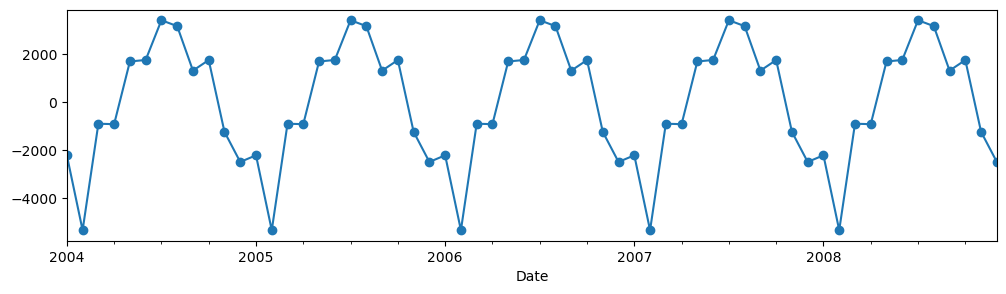

In [ ]:
# Narrow down the date range of the plot
seasonal = decomp.seasonal
ax = seasonal.loc['2004': '2008'].plot(marker = 'o')

# The seasonal period is 12, so we will use m = 12.

In [ ]:
# Check for stationarity
get_adfuller_results(ts_to)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-0.997489,15,259,0.754179,0.05,False


In [ ]:
# determine d
d = ndiffs(ts_to)
print (f'd = {d}')
# determine D
D = nsdiffs(ts_to, m = 12)
print (f'D = {D}')

d = 1
D = 0


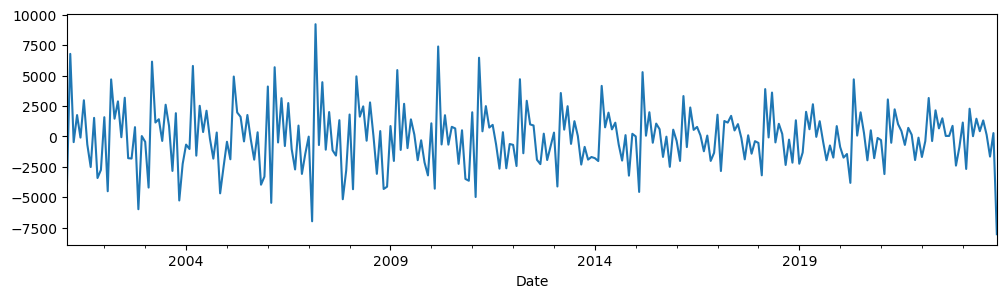

In [ ]:
ts_diff_to = ts_to.diff().dropna()
ts_diff_to.plot();

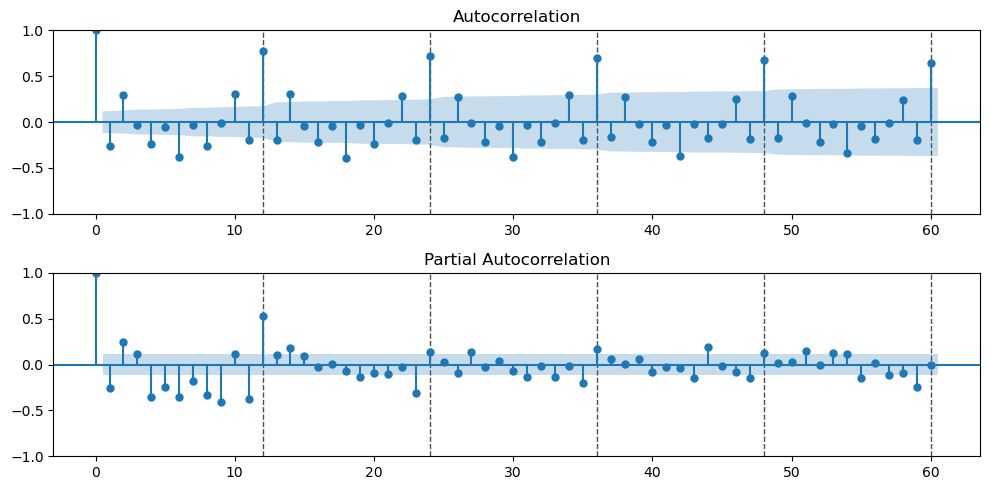

In [ ]:
# now look at the acf/pacf of the stationary data
plot_acf_pacf(ts_diff_to, annotate_seas = True, m = 12, nlags = 60);

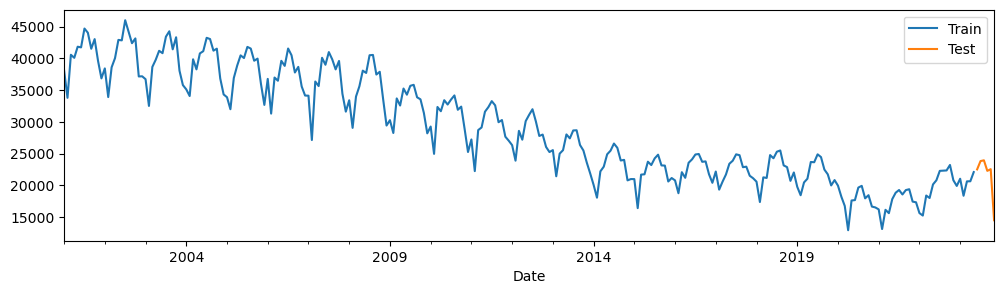

In [ ]:
# tts
train_to, test_to = train_test_split(ts_to, test_size=6)
ax = train_to.plot(label='Train')
test_to.plot(ax=ax, label='Test')
ax.legend();

In [ ]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima_to = tsa.ARIMA(train_to, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima_to.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            total   No. Observations:                  269
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -2352.399
Date:                          Tue, 05 Dec 2023   AIC                           4714.797
Time:                                  16:17:48   BIC                           4732.752
Sample:                              01-31-2001   HQIC                          4722.009
                                   - 05-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9955      0.029    -33.937      0.000      -1.053      -0.938
ma.L1          0.9941      0.034     29.269      0.000       0.928       1.061
ar.S.L12       0.9431      0.015     63.020      0.000       0.914       0.972
ma.S.L12      -0.7776      0.031    -24.770      0.000      -0.839      -0.716
sigma2      2.095e+06   2.07e-09   1.01e+15      0.000    2.09e+06    2.09e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.89   Jarque-Bera (JB):               174.04
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+31. Standard errors may be unstable.
"""

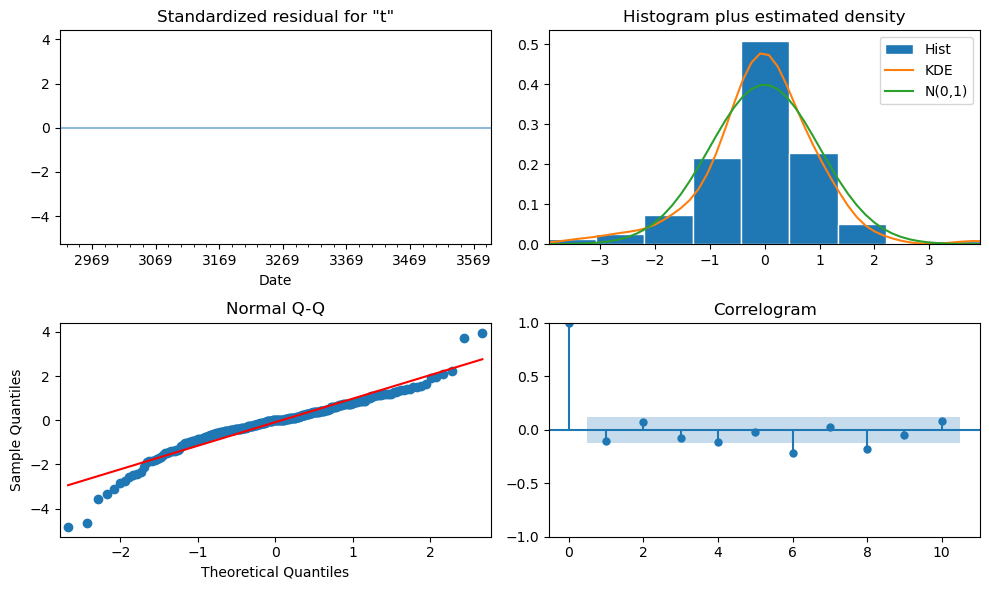

In [ ]:
# Obtain diagnostic plots
fig = sarima_to.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 1,360.919
- MSE = 6,934,493.579
- RMSE = 2,633.343
- R^2 = 0.340
- MAPE = 8.59%


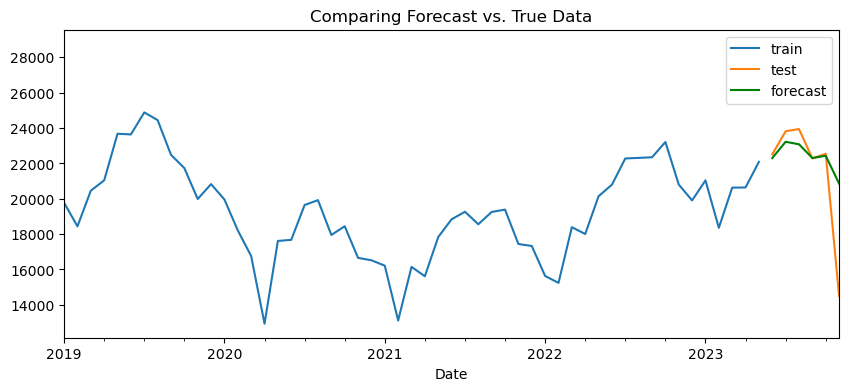

In [ ]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df_to = sarima_to.get_forecast(steps=len(test_to)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train_to.loc['2019':], test_to, forecast_df_to);
# Obtain metrics
regression_metrics_ts(test_to, forecast_df_to['mean'])

In [ ]:
# Default auto_arima will select model based on AIC score
auto_model_to = pm.auto_arima(
    train_to,
    seasonal=True,
    m=12,
    trace=True
)


# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model_to.order)
print(auto_model_to.seasonal_order)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4721.665, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4952.963, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4778.612, Time=0.31 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4839.741, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4951.121, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=4816.585, Time=0.95 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=4788.479, Time=1.09 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=4721.214, Time=2.22 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=4754.090, Time=2.13 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=4779.666, Time=2.48 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=4749.840, Time=1.88 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=4744.402, Time=1.76 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.35 sec
 ARIMA(2,1,3)(2,0,1)[12] inte

In [ ]:
# Obtain summary of the best model from auto_arima
auto_model_to.summary()

In [ ]:
# Obtain diagnostic plots
fig = auto_model_to.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

C:\Users\Work\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 1,301.535
- MSE = 6,582,139.103
- RMSE = 2,565.568
- R^2 = 0.373
- MAPE = 8.29%


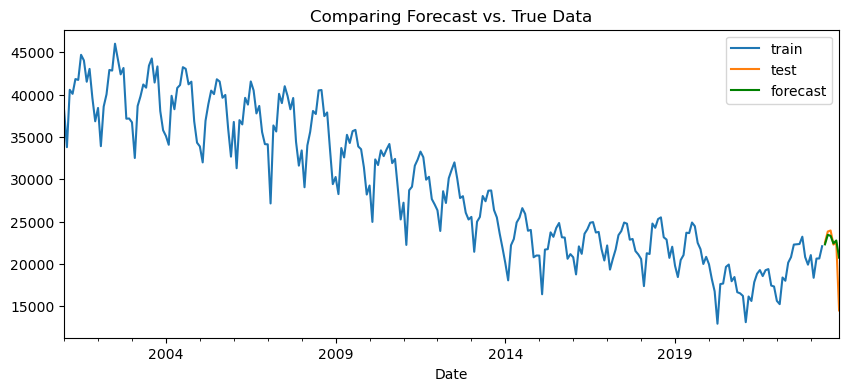

In [ ]:
# Use auto_arima parameters to fit an ARIMA
auto_model_to = tsa.ARIMA(
    train_to, order=auto_model_to.order, seasonal_order=auto_model_to.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df_to = auto_model_to.get_forecast(steps=len(test_to)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train_to, test_to, forecast_df_to);
# Obtain metrics
regression_metrics_ts(test_to, forecast_df_to['mean'])

In [ ]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 2  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 2  # nonseasonal MA

# Orders for seasonal components
P = 2  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

final_model_to = tsa.ARIMA(ts_to, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()



C:\Users\Work\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


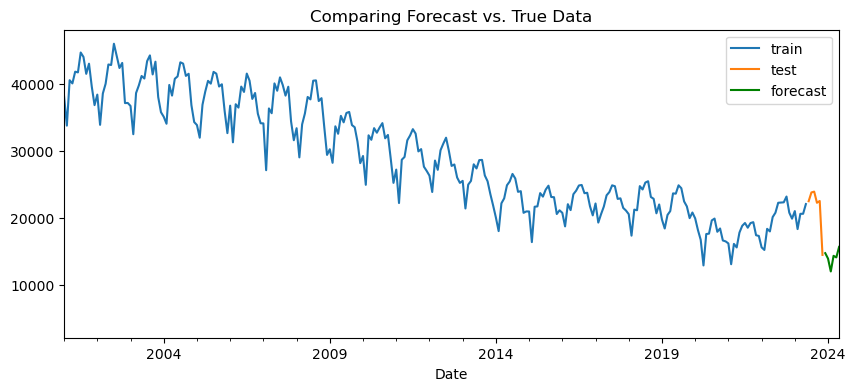

In [ ]:
# Obtain future forecasts beyond test data
forecast_df_to  = final_model_to.get_forecast(len(test_to)).summary_frame()
plot_forecast(train_to,test_to,forecast_df_to);

# Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast?
  - total crims.


In [ ]:
final_model_th.forecast(len(test_th))

2023-12-31    3075.329153
2024-01-31    2767.789065
2024-02-29    2313.013054
2024-03-31    2808.720033
2024-04-30    2725.656689
2024-05-31    3154.570451
Freq: M, Name: predicted_mean, dtype: float64

In [ ]:
final_model_to.forecast(len(test_to))

2023-12-31    14758.043437
2024-01-31    13949.811455
2024-02-29    12028.792093
2024-03-31    14360.146180
2024-04-30    14125.883234
2024-05-31    15697.496596
Freq: M, Name: predicted_mean, dtype: float64

# Of the two crimes, which is forecasted to have the highest net change by the end of the forecast?
  - total crims


In [ ]:
forecast_th = final_model_th.forecast(len(test_th))
delta_th = forecast_th[-1] - forecast_th[0]
delta_th

79.24129776119435

In [ ]:
forecast_th[-1] / forecast_th[0]

1.0257667696114539

In [ ]:
forecast_to = final_model_to.forecast(len(test_to))
delta_to = forecast_to[-1] - forecast_to[0]
delta_to

939.4531595738081

In [ ]:
forecast_to[-1]/forecast_to[0]

1.0636570263261576

# Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast?

In [ ]:
percent_th = delta_th/delta_to*100
print(f'the percent of THEFT is {round(percent_th,2)}%')

the percent of THEFT is 8.43%


In [ ]:
percent_to = delta_to/delta_to*100
print(f'the percent of totale crims is {round(percent_to,2)}%')

the percent of totlae crims is 100.0%


# What recommendation would you make to the stakeholders?

### when we look at forecast_th[-1] / forecast_th[0], we see that the theft crims increase at the end of forecast,
### mean that there is something changed (because when we look at the overall plot we expect all crimes decreasing, but the theft crims increase).